## Huracán María

Generar una gráfica de la trayectoria del huracán. 

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dtEscala = pd.read_excel('escala_saffir_simpson.xlsx')
dtEscala

,categoria,descripcion,color,nudos_min,nudos_max
0,TD,Depresion Tropical,deepskyblue,0,33
1,TS,Tormenta Tropical,lime,34,63
2,C1,Categoria 1,yellow,64,82
3,C2,Categoria 2,gold,83,95
4,C3,Categoria 3,orange,96,113
5,C4,Categoria 4,red,114,135
6,C5,Categoria 5,magenta,136,500


In [3]:
dtHu = pd.read_csv('huracan_maria.csv',sep=';')
dtHu['FECHA_HORA'] = \
pd.to_datetime(dtHu.FECHA + " 2005 " + dtHu.HORA, \
              infer_datetime_format=True)
dtHu.drop(columns=['FECHA','HORA'],inplace=True)
dtHu.head()

,LATITUD,LONGITUD,NUDOS,PRESION,FECHA_HORA
0,12.2,-50.5,35,1008,2005-09-16 15:00:00+00:00
1,11.9,-51.6,35,1006,2005-09-16 18:00:00+00:00
2,12.3,-52.6,50,1002,2005-09-16 21:00:00+00:00
3,12.4,-53.0,50,1002,2005-09-17 00:00:00+00:00
4,12.5,-53.7,50,1002,2005-09-17 03:00:00+00:00


In [4]:
dtHu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   LATITUD     120 non-null    float64            
 1   LONGITUD    120 non-null    float64            
 2   NUDOS       120 non-null    int64              
 3   PRESION     120 non-null    int64              
 4   FECHA_HORA  120 non-null    datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(2), int64(2)
memory usage: 4.8 KB


In [5]:
dtHu['CATEGORIA'] = ''
dtHu['COLOR'] = ''
for row in dtEscala.iterrows():
    _, fila = row
    n_min = fila['nudos_min']
    n_max = fila['nudos_max']
    color = fila['color']
    cat = fila['categoria']
    
    dtHu.loc[(dtHu.NUDOS >= n_min) & \
                   (dtHu.NUDOS <= n_max),\
    ['CATEGORIA','COLOR']]=cat,color
    
dtHu.loc[(dtHu.NUDOS >= 100) & (dtHu.NUDOS <= 120),'CATEGORIA']   

15    C3
16    C4
55    C4
56    C3
57    C3
58    C3
59    C4
60    C4
61    C4
62    C4
63    C4
64    C4
76    C4
77    C4
78    C4
79    C4
80    C3
81    C3
82    C3
83    C3
Name: CATEGORIA, dtype: object

Gráfica de la trayectoria del huracán

In [8]:
categorias = dtHu.CATEGORIA.unique()
print(categorias)
colores = dtHu.COLOR.unique()
print(colores)

['TS' 'C1' 'C2' 'C3' 'C4' 'C5']
['lime' 'yellow' 'gold' 'orange' 'red' 'magenta']


Text(0, 0.5, 'Latitud')

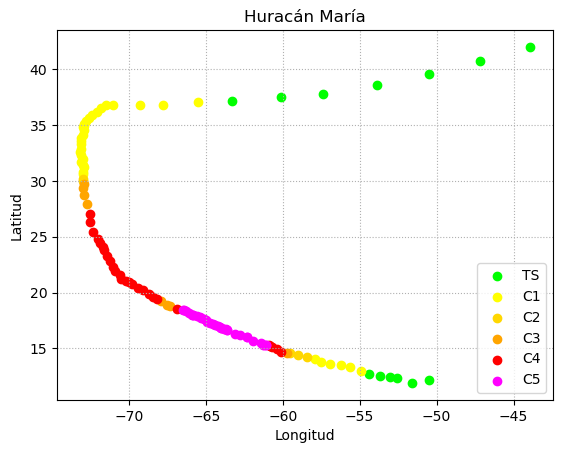

In [13]:
for pos,cat in enumerate(categorias):
    color = colores[pos]
    aux = dtHu[dtHu.CATEGORIA==cat]
    plt.scatter(aux.LONGITUD, aux.LATITUD, \
                label=cat,color=color)
plt.legend()
plt.title('Huracán María')
plt.grid(True, ls=':')
plt.xlabel('Longitud')
plt.ylabel('Latitud')

Generar una gráfica con la evolución de la velocidad y presión